# 분류 모델 성능 지표

- 모델 구현 후 성능 평가 방식
- 정확도(Accuracy) : 불균형 데이터 부적합
- 보완 평가 방식 : 정밀도 precision, 재현율 recall, F1 score -> confusion matrix로 계산


![텍스트](https://velog.velcdn.com/images%2Fsiyeon-hwang%2Fpost%2F2d11caa0-a055-4b9f-aa52-568f7be0dd0a%2Fimage.png)

## 1. 임시 데이터

In [10]:
y_true = [0 ,1 ,1, 0] # 답지 
y_pred = [1, 1, 1, 0] # 예측치

답 맞는 거 4개 중 3개

## 2. 분류 평가지표

In [11]:
# 2-1 분류 정확도 => accuracy
from sklearn.metrics import accuracy_score

ret = accuracy_score(y_true, y_pred)
print(f"[분류 정확도] => {ret}")

[분류 정확도] => 0.75


[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)의 score 까지 내려보면 accuracy를 사용한다고 되어있음

In [12]:
# 2-2 정밀도 => precision : 정밀도(맞다고 한 것 중에 맞는 거)
from sklearn.metrics import precision_score

ret = precision_score(y_true, y_pred)
print(f"[분류 정밀도] => {ret}")

[분류 정밀도] => 0.6666666666666666


In [13]:
# 2-3 재현율 => recall : 재현율(찐양성 중에 맞는 거)
from sklearn.metrics import recall_score

ret = recall_score(y_true, y_pred)
print(f"[분류 재현율] => {ret}")

[분류 재현율] => 1.0


In [14]:
# 2-4 f1 점수 => 정밀도와 재현율 상호보완 조화평균
from sklearn.metrics import f1_score

ret = f1_score(y_true, y_pred)
print(f"[분류 재현율] => {ret}")

[분류 재현율] => 0.8


상황에 따라 중요한 score가 따로 있음  
- case 1 ) 암 양성 -> 음성 판단 -> 죽음 : 재현율(recall)이 더 중요  
- case 2 ) 일반 메일 -> 양성 판단 -> 수신안됨 : 정밀도(precision)가 더 중요
  
단, 하나가 올라가면 하나는 내려가는 상충관계임을 유의

In [15]:
# 2-5 confusion matrix 값 출력
from sklearn.metrics import confusion_matrix

In [18]:
ret_matrix = confusion_matrix(y_true, y_pred)
ret_matrix

array([[1, 1],
       [0, 2]], dtype=int64)

In [29]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
# ravel() : 다차원 배열을 1차원으로 펴줌 
tn, fp, fn, tp

(1, 1, 0, 2)

In [23]:
# 정확도 정밀도 재현율 f1-score 계산
accuracy = (tn + tp)/(tn + fp + fn + tp)# 정확도 accuracy
precision = tp / (tp + fp) # 정밀도
recall = tp / (tp + fn)# 재현율
f1 = 2 * (recall * precision) / (recall + precision)

In [25]:
print(f"정확도 => {accuracy}")
print(f"정밀도 => {precision}")
print(f"재현율 => {recall}")
print(f"f1_score => {f1}")

정확도 => 0.75
정밀도 => 0.6666666666666666
재현율 => 1.0
f1_score => 0.8


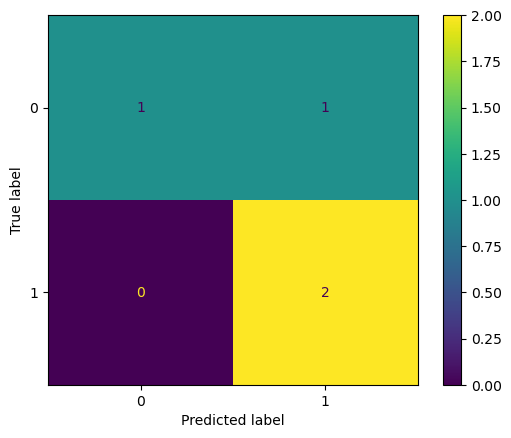

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ret_matrix = confusion_matrix(y_true, y_pred)
conplot = ConfusionMatrixDisplay(ret_matrix)
conplot.plot()
plt.show()

OVO OVR 중 일반적으로 OVR을 사용 

In [27]:
confusion_matrix(y_true, y_pred).reshape(1,-1)

array([[1, 1, 0, 2]], dtype=int64)

In [28]:
confusion_matrix(y_true, y_pred).reshape(-1)

array([1, 1, 0, 2], dtype=int64)

regularizaion -> 규제(가중치를 통해 과대적합 방지)
normalization -> 정규화
standardization -> 표준화 

선형회귀에서는 과대적합을 조절할 수 있는 매개변수가 없어서 릿지와 라쏘를 써서 해결해야함(모델을 바꾸는 것)

분류는 타겟에 맞춰서 오차(단순 빼기 불가능)를 계산해야함 
